# Chapitre 4 - Entraîner des modèles linéaires

On va aller voir de manière plus approfondie comment les choses fonctionnent et comment choisir un modèle approprié.

## Setup

In [1]:
#python >= 3.5 nécessaire
import sys
assert sys.version_info >= (3, 5)

#scikit-learn >= 0.20 nécessaire
import sklearn
assert sklearn.__version__ >= "0.20"

# Autres imports
import numpy as np
import os

# pour rendre les output stables au fil des runs
np.random.seed(42)

# pour tracer de jolis graphes
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# où sauvegarder les figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# ignorer les warnings inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Régression linéaire

Un modèle linéaire fait des prédictions en calculant simplement une somme pondérée des caractéristiques en entrée (*input features*), plus une constante appelée terme de biais (*bias term*).

*Prédiction du modèle de régression linéaire*
$$
\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{1}x_{1} + \cdots + \theta_{n}x_{n}
$$

Dans cette équation :
- $\hat{y}$ est la *valeur prédite*
- $n$ est le nombre de caractéristiques (*features*)
- $x_{i}$ est la $i^{ème}$ valeur de caractéristique (*feature value*)
- $\theta_{j}$ est le $j^{ème}$ paramètre du modèle (qui inclut le terme de biais $\theta_{0}$ les poids des caractéristiques (*feature weight*) $\theta_{1}$, $\theta_{2}$, ..., $\theta_{n}$)

Cette équation peut être écrite de manière plus concise en utilisant une forme vectorisée :

*Prédiction du modèle de régression linéaire (forme vectorisée)*
$$
\hat{y} = h_{\theta}(x) = \theta \cdot x
$$

Dans cette équation :
- $\theta$ est le *vecteur de paramètre* (*parameter vector*) du modèle, contenant le terme de biais $\theta_{0}$ et la pondération des caractéristiques $\theta_{1}$ à $\theta_{n}$.
- $x$ est le *vecteur de caractéristique* (*feature vector*), contenant $x_{0}$ à $x_{n}$, avec $x_{0}$ toujours égal à 1
- $\theta \cdot x$ est le produit scalaire des vecteurs $\theta$ et $x$, qui est bien sûr égal à $\theta_{1}x_{1} + \theta_{1}x_{1} + \cdots + \theta_{n}x_{n}$
- $h_{\theta}$ est la fonction d'hypothèse, utilisant les paramètres du modèle $\theta$.

Voilà pour la modèle de régression linéaire. On va maintenant voir comment l'entraîner ; il va avoir besoin qu'on règle ses paramètres pour qu'il corresponde le plus au JdE.

Dans ce but, on va d'abord avoir besoin d'une mesure de la façon dont le modèle s'ajuste bien (ou mal) au JdE ; on va utiliser la RMSE (*Root Mean Square Error*) pour ça. Dincn, pour entraîner un modèle de régression linéaire, on va avoir besoin de *trouver la valeur de $\theta$ qui minimise* le RMSE. Dans la pratique, c'est plus simple de minimser la MSE (*Mean Squared Errpr*) que la RMSE, et ça conduit au même résultat (parce que la valeur qui minimise une fonction minimise aussi sa racine carrée).

La MSE d'une hypothèse $h_{\theta}$ d'un JdE X est calculé selon l'équation suivante :

$$
MSE(X, h_{\theta}) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{⊺}x^{(i)}-y^{(i)})^2
$$

On écrit $h_{\theta}$ au lieu de $h$ pour être clair que le modèle est paramétré par le vecteur $\theta$. Pour simplifier les notations, on va écrire MSE($\theta$) au lieu de $MSE(X, h_{\theta})$


### L'équation normale (the normal equation)

Pour trouver la valeur de $\theta$ qui minimise la fonction de coût, il y a une solution en forme fermée (*closed form solution*), en d'autres mots, une equation mathématique qui donne le résultat directement. C'est ce qu'on appelle l'équation normale :

$$
\hat{\theta} = (X^{⊺}X)^{-1} X^{⊺} y
$$

Dans cette équation :
- $\hat{\theta}$ est la valeur de $\theta$ qui minimise la fonction de coût
- $y$ est le vecteur des valeurs cibles contenant $y^{1}$ à $y^{m}$

On va maintenant générer des données qui ressemblent à quelque chose de linéaire pour tester cette equation :

Saving figure generated_data_plot


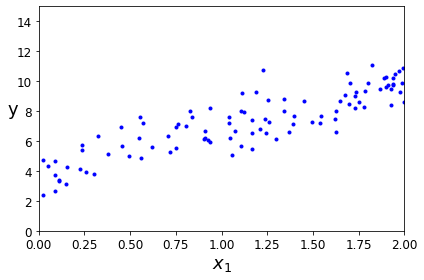

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# tracer le graphe
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([0, 2, 0 ,15])
save_fig("generated_data_plot")
plt.show()

Maintenant, on va calculer $\hat{\theta}$ en utilisant l'équation normale. Onva utiliser la fonction `inv()` du module d'algèrbe linéaire de NumPy (`np.linalg`) pour calculer l'inverse d'une matrice, et la méthode `dot()` pour la multiplication des matrices :

In [6]:
X_b = np.c_[np.ones((100,1)), X]    # ajoute x0 = 1 à chaque instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

La fonction qu'on a utilisé pour générer les données est $y = 4 + 3x_{i} + "bruit gaussien"$. Voyons voir ce que l'équation trouve :

In [7]:
theta_best

array([[3.9202609],
       [2.9609808]])

On aurait aimé trouver $\theta_{0}=4$ et $\theta_{1}=3$. On a un résultat assez proche mais le bruit rend impossible la découverte des paramètres exacts de la fonction d'origine.

Maintenant, on peut faire des prédictions en utilisant $\hat{\theta}$ :

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # ajoute x0 = 1 à chaque instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.9202609],
       [9.8422225]])

On va maintenant tracer les prédictions du modèle :

Saving figure linear_model_predictions_plot


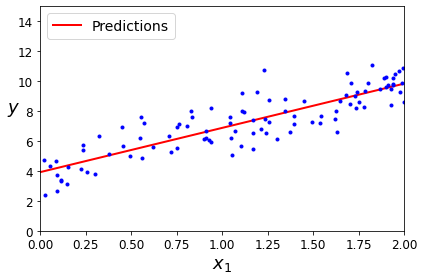

In [9]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

Réaliser une Régression Linéaire en utilisant Scikit-Learn est simple (à noter que sklearn sépare le terme de biais (`intercept_`) des poids des caractéristiques (*feature weights*)):

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.9202609]), array([[2.9609808]]))

In [11]:
lin_reg.predict(X_new)

array([[3.9202609],
       [9.8422225]])

La classe `LinearRegression` est basée sur la fonction `scipy.linalg.lstsq()` (*least square*), qu'on peut appeler directement :

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.9202609],
       [2.9609808]])

Cette fonction calcule $\hat{\theta} = X^{+}y$ où $X^{+}$ est le *pseudoinverse* de X (l'inverse de Moore-Penrose). On peut utiliser `np.linalg.pinv()` pour calculer le pseudoinverse directement :

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[3.9202609],
       [2.9609808]])

Le pseudoinverse en lui-même est calculé à l'aide d'une technique de factorisation matricielle standard appelée SVD (*Standard Value Decomposition*) qui peut décomposer la matrice du JdE **X** en une matrice de multiplication de trois matrices $U \sum V^{⊺}$ (voir `numpy.linalg.svd()`).

Le pseudoinverse est calculé comme $X^{+} = \sum^{+}U^{⊺}$. Pour calculer la matrice **$\sum^{+}$**, l'algorithme prend **$\sum$** et mets à 0 toutes les valeurs plus petites qu'une minuscule valeur seuil, et remplace toutes les valeurs différentes de 0 par leur inverse, pour finalement les transpoer dans la matrice résultante.

Cette approche est plus efficace que de calculer l'équiation normale, et permet se charger des cas extrêmes d'une bonne manière : en effet, l'équation normale ne marche pas si la matrice $X^{⊺}X$ n'est pas inversible (c'est à dire singulière), comme si m < n ou si certaines caractéristiques (*features*) sont redondantes, mais que la pseudo-inverse est toujours définie.

### Complexité Computationnelle

L'équation normale caclue l'inverse de $X^{⊺}X$, qui est une matrice $(n+1)*(n+1)$ (où $n$ est le nombre de caractéristiques (*features*)). La *complexité computationnelle* de l'inversion d'une telle matrice est typiquement en $O(n^{2.4}$ ou $O(n^{3}$, dépendemment de l'implémentation. En d'autres termes, si on double le nombre de caractéristiques (*features*), on multiplie le temps de calcul par environ $2^{2.4} = 5.3$ à $2^{3} = 8$.

L'approche SVD utilisée par la classe `LinearRegression` de Scikit-Learn est en $O(n^{2})$. Si on double le nombre de caractéristiques (*features*), on multiplie le temps de calcul par 4.

*Attention* : aussi bien l'Équation Normale que l'approche SVD sont très lentes quand le nombre de caractéristiques (*features*) devient grand (environ 100 000). Mais elles sont toutes les deux linéaires en ce qui concerne le nombre d'instances du JdE ($O(m)$), donc elles prennent très bien en charge les grands JdE, à condition qu'on puisse les mettre en mémoire.

De plus, une fois qu'on a entraîné nos modèles de Régression Linéaire, les prédictions sont très rapides : la complexité computationnelle est linéaire aussi bien au regard du nombre d'instances qu'on veut prédire ainsi que le nombre de *features*.

On va maintenant s'intéresser à d'autres manières bien différentes d'entraîner un modèle de Régression Linéaire, qui seront plus adaptées pour des cas où on a un grand nombre de *features* ou trop d'instances d'entraînement pour rentrer en mémoire.

## Descente de gradient (*Gradient descent*)

La descente de gradient est un algorithme générique d'optimisation  capable de trouver des solutions optimales à un large champ de problèmes. L'idée générale est de modifier les paramètres de manière itérative afin de minimiser une fonction de coût.

Elle mesure le gradient local de la fonction d'erreur par rapport au vecteur paramètre $\theta$, et va dans le sens du gradient descendant. Une fois la pente nulle, on atteint un minimum.

Concrètement, on commence par remplir $\theta$ de valeurs aléatoires (c'est ce qu'on appelle l'*initialisation aléatoire* (*random initialization*)). Ensuite, on l'améliore graduellement, pas à pas, chaque pas essayant de réduire le coût de la fonction (ex : MSE), jusqu'à ce que l'algorithme *converge* vers un minimum.

Un paramètre important de la descente de gradient est la taille des pas, determinée par l'hyperparamètre *taux d'apprentissage* (*learning rate*). Si le taux d'apprentissage est trop petit, alors l'algo va devoir passer par de nombreuses itérations pour converger, ce qui prendra un certain temps.

Si le taux d'apprentissage est trop élevé, on peut "sauter" de l'autre côté, et même plus haut qu'avant. Cela va faire diverger l'algorithme, avec valeurs de plus en plus larges, l'empêchant de trouver une bonne solution.

Enfin, il faut savoir que toutes les fonctions ressemblent à un bol régulier. Il peut y avoir des trous, des crêtes, et des irrégularités, rendant la convergence vers le minimum difficile. On se retrouve parfois un minimum local qui empêche d'accéder au minimum global, en fonction de là où l'algo a commencé, ou encore avec des plateau qui font stagner la recherche.

Heureusement, la fonction de coût MSE pour une Régression Linéaire est une *fonction convexe*, ce qui veut dire que si on prend au hasard deux points dans la courbe, la ligne qui le rejoint ne va jamais croiser la courbe. Cela implique qu'il y a seulement un minimum global et pas de minimum local. C'est également une fonction avec une pente qui ne change jamais de manière abrupte. Ces deux faits ont une très bonne conséquence : la Descente de Gradient garanti qu'on va approcher arbitrairement du minimum global (si on attend suffisamment longtemps et si le taux d'apprentissage n'est pas trop élevé).

En fait, la fonction de coût a la forme d'un bol qui peut être allongé si les *features* ont des échelles très différentes, ce qui va faire que dans ce cas, il mettra beaucoup plus de temps à atteindre le minimum global. Quand on utilse la Descente de Gradient, il vaut mieux s'assurer qu'on a des *features* avec les mêmes échelles pour éviter ce problème.

Entraîner un modèle implique de chercher une combinaison de paramètres du modèle qui minimisent une fonction de coût (sur le JdE). C'est une recherche dans l'*espace des paramètres* : plus un modèle a de paramètres, plus l'espace a de dimensions, et plus dure est la recherche.

### Descente de gradient de lot (*Batch Gradient Descent*)

Pour implémenter la descente de gradient, on doit calculer le gradient de la fonction de coût pour chaque paramètre $\theta_{j}$ du modèle. Autrement dit, on doit calculer de combien va changer la fonction de cout si on change $\theta_{j}$ juste un peu. C'est ce qu'on appelle une *dérivée partielle*.

L'équation suivante calcule la dérivée partielle de la fonction de coût par rapport au paramètre $\theta_{j}$, noté $\partial MSE(\theta) / \partial{\theta_{j}}$ :

$$
\frac{\partial}{\partial{\theta_{j} }}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^{⊺}x^{(i)} - y^{j})x_{j}^{i}
$$

Au lieu de calculer ces dérivées partielles individuellement, on peut toutes les calculer d'un coup. Le vecteur gradiant, noté $∇_{\theta} MSE(\theta)$ contient toutes les dérivées partielles de la fonction de coût (une pour chaque paramètre du modèle).

Une fois qu'on a notre vecteur gradient, qui pointe en haut, il faut juste aller dans l'autre direction et aller vers le bas. Cela implique de soustraire $∇_{\theta} MSE(\theta)$ de $\theta$. C'est ici que le taux d'apprentissage $\eta$ rentre en jeu : multiplier le vecteur gradient par $\eta$ pour déterminer la taille du pas vers le bas.

Regardons l'implémentation de cet algorithme :

In [16]:
eta = 0.1   # taux d'apprentissage
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)   # initialisation aléatoire

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.9202609],
       [2.9609808]])